# Kaggle: Titanic Project (Random Forest)

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.imputation import mice
%matplotlib inline

In [303]:
gender = pd.read_csv("gender_submission.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

### Exploratory Data Analysis

In [233]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


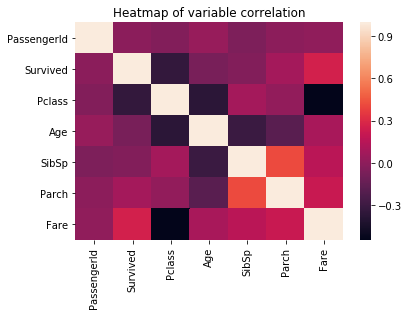

In [234]:
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values).set_title("Heatmap of variable correlation")
plt.show()

In [235]:
#Take the y variable off from the training set
y_train = train.Survived
x_train = train.drop(['Survived'],axis = 1)

In [236]:
#Survival versus Pclass
Pclass_sum = train.loc[:,['Survived','Pclass']].groupby(by='Pclass').agg('sum')
Pclass_count = train.loc[:,['Survived','Pclass']].groupby(by='Pclass').agg('count')
Pclass_sum/Pclass_count

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [237]:
#Survival versus sex
sex_sum = train.loc[:,['Survived','Sex']].groupby(by='Sex').agg('sum')
sex_count = train.loc[:,['Survived','Sex']].groupby(by='Sex').agg('count')
sex_sum/sex_count

,Survived
Sex,
female,0.742038
male,0.188908


In [238]:
#Survival versus Age
#Set Age interval
#(class, age): (0, 0-10), (1, 11-20), (2, 21-30), (3, 31-40), (4, 41-50), (5, 51-60), (6, 61-70), (7, 71-80)
print("Age 0~10: ",train[train.Age.between(0,10)].Survived.sum()/train[train.Age.between(0,10)].Survived.count())
print("Age 11~20: ",train[train.Age.between(11,20)].Survived.sum()/train[train.Age.between(11,20)].Survived.count())
print("Age 21~30: ",train[train.Age.between(21,30)].Survived.sum()/train[train.Age.between(21,30)].Survived.count())
print("Age 31~40: ",train[train.Age.between(31,40)].Survived.sum()/train[train.Age.between(31,40)].Survived.count())
print("Age 41~50: ",train[train.Age.between(41,50)].Survived.sum()/train[train.Age.between(41,50)].Survived.count())
print("Age 51~60: ",train[train.Age.between(51,60)].Survived.sum()/train[train.Age.between(51,60)].Survived.count())
print("Age 61~70: ",train[train.Age.between(61,70)].Survived.sum()/train[train.Age.between(61,70)].Survived.count())
print("Age 71~80: ",train[train.Age.between(71,80)].Survived.sum()/train[train.Age.between(71,80)].Survived.count())


Age 0~10:  0.59375
Age 11~20:  0.3826086956521739
Age 21~30:  0.36681222707423583
Age 31~40:  0.45098039215686275
Age 41~50:  0.39285714285714285
Age 51~60:  0.40476190476190477
Age 61~70:  0.23529411764705882
Age 71~80:  0.25


In [239]:
#Survival versus SibSp
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [240]:
#Survival versus SibSp
sibsp_sum = train.loc[:,['Survived','SibSp']].groupby(by='SibSp').sum()
sibsp_count = train.loc[:,['Survived','SibSp']].groupby(by='SibSp').count()
sibsp_sum/sibsp_count

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [241]:
#Survival versus Parch
parch_sum = train.loc[:,['Survived','Parch']].groupby(by='Parch').sum()
parch_count = train.loc[:,['Survived','Parch']].groupby(by='Parch').count()
parch_sum/parch_count

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


Text(0,0.5,'survival rate')

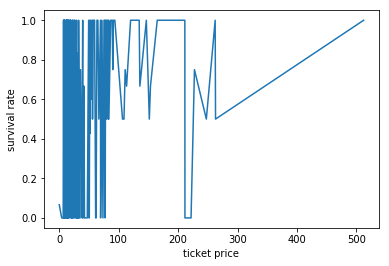

In [242]:
#Survival versus Fare
fare_sum = train.loc[:,['Survived','Fare']].groupby(by='Fare').sum()
fare_count = train.loc[:,['Survived','Fare']].groupby(by='Fare').count()
fare_df = fare_sum/fare_count
#plt.plot(y = fare_df.values, x = fare_df.index)
plt.plot(fare_df)
plt.xlabel("ticket price")
plt.ylabel("survival rate")

In [243]:
#Survival versus Embarked
embarked_sum = train.loc[:,['Survived','Embarked']].groupby(by='Embarked').sum()
embarked_count = train.loc[:,['Survived','Embarked']].groupby(by='Embarked').count()
embarked_sum/embarked_count

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


### Check missing values

In [244]:
train.isnull().sum() # of total observation = 891

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Missing values imputation strategy**: <br>
- **Age**: impute missing values with mean values
- **Cabin**: This column contains 687 missing values. Since 77% of observations are missing, I would drop this column. 
- **Embaked**: Since there are only two missing values in the dataset, it has very limited impacts no matter which imputation strategy I adopt.

In [245]:
#Cabin
x_train = x_train.drop(columns = ['Cabin'])
x_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [246]:
#Embarked
x_train.Embarked.value_counts() #S is the most frequent one. I will impute NAs with S

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [247]:
x_train['Embarked'] = x_train['Embarked'].fillna(value = 'S')

In [248]:
x_train[['Pclass', 'Sex','Age','SibSp','Parch','Fare','Embarked']].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


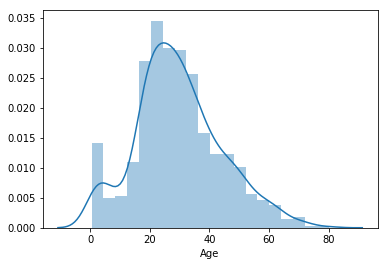

In [249]:
#Age
sns.distplot(train.Age.dropna())

In [250]:
x_train = x_train.fillna(x_train.mean())

### Data Pre-processing and Cross Validation

In [251]:
x_train = x_train.drop(columns = ['Name','Ticket'])

In [252]:
#create dummy variable
train_dum = pd.get_dummies(x_train, prefix='C_', columns=['Sex'])
train_dum = pd.get_dummies(train_dum, prefix='C_', columns=['Embarked'])

In [254]:
x_train = train_dum

In [255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

### Logistic Regression Model

In [264]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=0,solver='lbfgs').fit(X_train,y_train)
accuracy_logit_train = sum(logit.predict(X_train) == y_train)/y_train.shape[0]
accuracy_logit_test = sum(logit.predict(X_test) == y_test)/y_test.shape[0]
print("Accuracy for the training set: {}".format(accuracy_logit_train))
print("Accuracy for the validation set: {}".format(accuracy_logit_test))

Accuracy for the training set: 0.7991573033707865
Accuracy for the validation set: 0.7821229050279329


### Random Forest Model

In [282]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
rf.fit(X_train, y_train)
accuracy_rf_train = sum(rf.predict(X_train) == y_train)/y_train.shape[0]
accuracy_rf_test = sum(rf.predict(X_test) == y_test)/y_test.shape[0]
print("Accuracy for the training set: {}".format(accuracy_rf_train))
print("Accuracy for the validation set: {}".format(accuracy_rf_test))

Accuracy for the training set: 0.8230337078651685
Accuracy for the validation set: 0.8100558659217877


### Test Set Pre-processing

In [304]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [306]:
#Missin values detection
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [308]:
test.Fare.value_counts().head()

7.7500     21
26.0000    19
8.0500     17
13.0000    17
7.8958     11
Name: Fare, dtype: int64

In [309]:
test['Fare'] = test['Fare'].fillna(value = 7.75)

In [310]:
test = test.fillna(test.mean())

In [311]:
test = test.drop(columns=['Name','Ticket','Cabin'])

In [312]:
#create dummy variable
test_dum = pd.get_dummies(test, prefix='C_', columns=['Sex'])
test_dum = pd.get_dummies(test_dum, prefix='C_', columns=['Embarked'])

In [313]:
test_dum.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C__female,C__male,C__C,C__Q,C__S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [342]:
test_prediction = rf.predict(test_dum)
temp = np.array(list(zip(test.PassengerId,list(test_prediction))))
temp

array([[ 892,    0],
       [ 893,    0],
       [ 894,    0],
       [ 895,    0],
       [ 896,    1],
       [ 897,    0],
       [ 898,    1],
       [ 899,    0],
       [ 900,    1],
       [ 901,    0],
       [ 902,    0],
       [ 903,    0],
       [ 904,    1],
       [ 905,    0],
       [ 906,    1],
       [ 907,    1],
       [ 908,    0],
       [ 909,    0],
       [ 910,    0],
       [ 911,    1],
       [ 912,    0],
       [ 913,    0],
       [ 914,    1],
       [ 915,    0],
       [ 916,    1],
       [ 917,    0],
       [ 918,    1],
       [ 919,    0],
       [ 920,    0],
       [ 921,    0],
       [ 922,    0],
       [ 923,    0],
       [ 924,    0],
       [ 925,    0],
       [ 926,    0],
       [ 927,    0],
       [ 928,    1],
       [ 929,    1],
       [ 930,    0],
       [ 931,    0],
       [ 932,    0],
       [ 933,    0],
       [ 934,    0],
       [ 935,    1],
       [ 936,    1],
       [ 937,    0],
       [ 938,    0],
       [ 939,

In [343]:
np.savetxt("submission1.csv", temp, delimiter=",")